🌟 7 Angel Stocks LSTM Prediction + Data Warehouse 🌟
📊 Data Source: Yahoo Finance API (yfinance)
💾 CSV Files will be saved to: ./data_warehouse/

📈 Processing AAPL - Apple Inc.
📥 กำลังดาวน์โหลดข้อมูล AAPL จาก Yahoo Finance...
💾 บันทึก AAPL raw data -> data_warehouse/raw_data/AAPL_raw_data.csv
🔄 กำลังฝึก model สำหรับ AAPL...
💾 บันทึก AAPL predictions -> data_warehouse/predictions/AAPL_predictions.csv
✅ AAPL สำเร็จ - RMSE: 6.34

📈 Processing MSFT - Microsoft Corp.
📥 กำลังดาวน์โหลดข้อมูล MSFT จาก Yahoo Finance...
💾 บันทึก MSFT raw data -> data_warehouse/raw_data/MSFT_raw_data.csv
🔄 กำลังฝึก model สำหรับ MSFT...
💾 บันทึก MSFT predictions -> data_warehouse/predictions/MSFT_predictions.csv
✅ MSFT สำเร็จ - RMSE: 11.33

📈 Processing GOOGL - Alphabet Inc.
📥 กำลังดาวน์โหลดข้อมูล GOOGL จาก Yahoo Finance...
💾 บันทึก GOOGL raw data -> data_warehouse/raw_data/GOOGL_raw_data.csv
🔄 กำลังฝึก model สำหรับ GOOGL...
💾 บันทึก GOOGL predictions -> data_warehouse/predictions/GOOGL_predictions.csv
✅ GOOGL สำเร

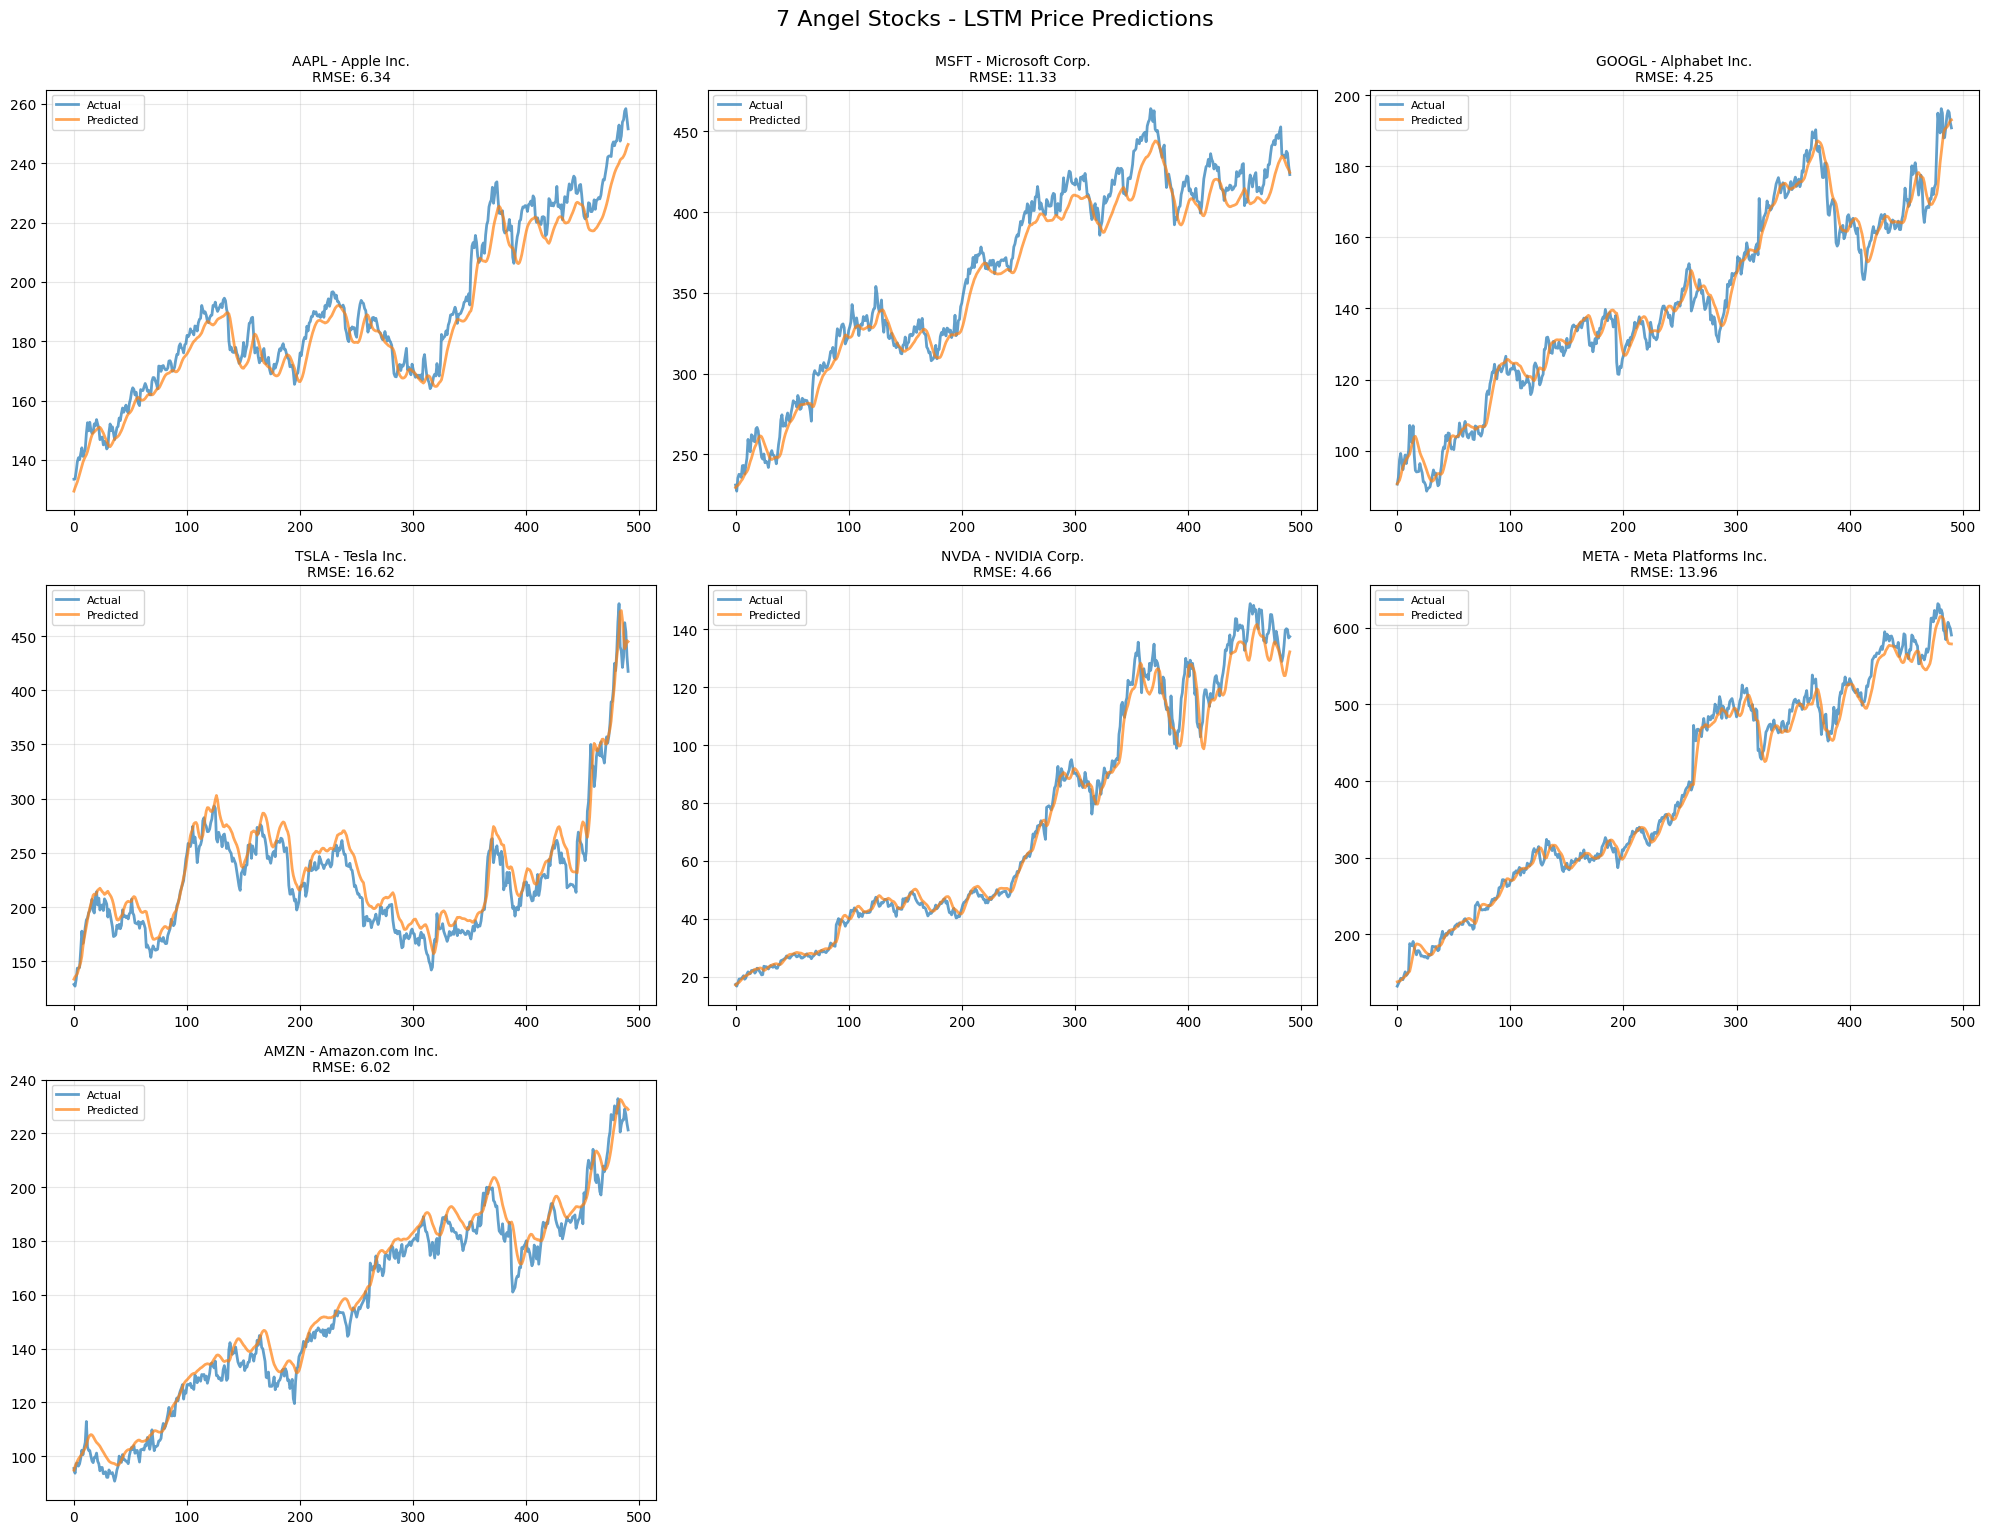


💾 SAVING DATA WAREHOUSE FILES...
✅ Combined Raw Data: data_warehouse/ALL_STOCKS_RAW_DATA.csv
   📊 Total Records: 17,605
✅ Combined Predictions: data_warehouse/ALL_STOCKS_PREDICTIONS.csv
   📊 Total Predictions: 3,437
✅ Performance Analytics: data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv
✅ Data Dictionary: data_warehouse/DATA_DICTIONARY.csv

📁 DATA WAREHOUSE STRUCTURE:
└── data_warehouse/
    ├── ALL_STOCKS_RAW_DATA.csv       (รวมข้อมูลดิบทั้งหมด)
    ├── ALL_STOCKS_PREDICTIONS.csv    (รวมการพยากรณ์ทั้งหมด)
    ├── DATA_DICTIONARY.csv           (คำอธิบายข้อมูล)
    ├── raw_data/                     (ข้อมูลดิบแต่ละหุ้น)
    │   ├── AAPL_raw_data.csv
    │   ├── MSFT_raw_data.csv
    │   └── ... (7 files)
    ├── predictions/                  (การพยากรณ์แต่ละหุ้น)
    │   ├── AAPL_predictions.csv
    │   ├── MSFT_predictions.csv
    │   └── ... (7 files)
    └── analytics/
        └── PERFORMANCE_ANALYTICS.csv (วิเคราะห์ประสิทธิภาพ)

📊 SUMMARY RESULTS - 7 ANGEL STOCKS

🏆 PERFORMANCE 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
import os
from datetime import datetime  
warnings.filterwarnings('ignore')

# สร้าง folder สำหรับเก็บ CSV files
os.makedirs('data_warehouse', exist_ok=True)
os.makedirs('data_warehouse/raw_data', exist_ok=True)
os.makedirs('data_warehouse/predictions', exist_ok=True)
os.makedirs('data_warehouse/analytics', exist_ok=True)

# 1. กำหนด 7 Angel Stocks
angel_stocks = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'GOOGL': 'Alphabet Inc.',
    'TSLA': 'Tesla Inc.',
    'NVDA': 'NVIDIA Corp.',
    'META': 'Meta Platforms Inc.',
    'AMZN': 'Amazon.com Inc.'
}

print("🌟 7 Angel Stocks LSTM Prediction + Data Warehouse 🌟")
print("=" * 60)
print("📊 Data Source: Yahoo Finance API (yfinance)")
print("💾 CSV Files will be saved to: ./data_warehouse/")
print("=" * 60)

# 2. ฟังก์ชันสำหรับสร้างข้อมูลลำดับ
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# 3. ฟังก์ชันสำหรับสร้างและฝึก LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 4. ฟังก์ชันสำหรับคำนวณ metrics
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# 5. เก็บผลลัพธ์
results = {}
predictions_data = {}
all_raw_data = []  # สำหรับรวมข้อมูลดิบทั้งหมด
all_predictions = []  # สำหรับรวมข้อมูลพยากรณ์ทั้งหมด

# 6. วนลูปผ่านแต่ละหุ้น
plt.figure(figsize=(20, 15))

for idx, (symbol, name) in enumerate(angel_stocks.items(), 1):
    print(f"\n📈 Processing {symbol} - {name}")
    
    try:
        # โหลดข้อมูลหุ้น
        print(f"📥 กำลังดาวน์โหลดข้อมูล {symbol} จาก Yahoo Finance...")
        df = yf.download(symbol, start='2015-01-01', end='2024-12-31', progress=False)
        
        # เพิ่มข้อมูลสำหรับ Data Warehouse
        df_warehouse = df.copy()
        df_warehouse['Symbol'] = symbol
        df_warehouse['Company_Name'] = name
        df_warehouse['Date'] = df_warehouse.index
        df_warehouse = df_warehouse.reset_index(drop=True)
        
        # บันทึกข้อมูลดิบแต่ละหุ้น
        csv_filename = f'data_warehouse/raw_data/{symbol}_raw_data.csv'
        df_warehouse.to_csv(csv_filename, index=False)
        print(f"💾 บันทึก {symbol} raw data -> {csv_filename}")
        
        # เพิ่มเข้า all_raw_data
        all_raw_data.append(df_warehouse)
        
        data = df[['Close']].copy()
        
        if len(data) < 100:  # ตรวจสอบว่ามีข้อมูลเพียงพอ
            print(f"⚠️ ข้อมูล {symbol} ไม่เพียงพอ")
            continue
        
        # Scaling
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data)
        
        # สร้างชุดข้อมูลลำดับ
        sequence_length = 60
        X, y = create_sequences(scaled_data, sequence_length)
        
        if len(X) == 0:
            print(f"⚠️ ไม่สามารถสร้างลำดับข้อมูลสำหรับ {symbol}")
            continue
        
        # แบ่ง train/test
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        # สร้างและฝึก LSTM
        model = create_lstm_model((X.shape[1], 1))
        
        print(f"🔄 กำลังฝึก model สำหรับ {symbol}...")
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                          validation_split=0.1, verbose=0)
        
        # พยากรณ์
        predicted = model.predict(X_test, verbose=0)
        predicted_prices = scaler.inverse_transform(predicted)
        real_prices = scaler.inverse_transform(y_test)
        
        # คำนวณ metrics
        mse, mae, rmse = calculate_metrics(real_prices, predicted_prices)
        
        # เก็บผลลัพธ์
        results[symbol] = {
            'name': name,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'last_price': real_prices[-1][0],
            'predicted_next': predicted_prices[-1][0]
        }
        
        predictions_data[symbol] = {
            'actual': real_prices.flatten(),
            'predicted': predicted_prices.flatten(),
            'dates': data.index[train_size + sequence_length:]
        }
        
        # สร้าง DataFrame สำหรับ predictions และบันทึกเป็น CSV
        pred_df = pd.DataFrame({
            'Date': data.index[train_size + sequence_length:],
            'Symbol': symbol,
            'Company_Name': name,
            'Actual_Price': real_prices.flatten(),
            'Predicted_Price': predicted_prices.flatten(),
            'Prediction_Error': real_prices.flatten() - predicted_prices.flatten(),
            'Error_Percentage': ((real_prices.flatten() - predicted_prices.flatten()) / real_prices.flatten()) * 100
        })
        
        # บันทึกการพยากรณ์แต่ละหุ้น
        pred_filename = f'data_warehouse/predictions/{symbol}_predictions.csv'
        pred_df.to_csv(pred_filename, index=False)
        print(f"💾 บันทึก {symbol} predictions -> {pred_filename}")
        
        # เพิ่มเข้า all_predictions
        all_predictions.append(pred_df)
        
        # สร้างกราฟ
        plt.subplot(3, 3, idx)
        plt.plot(real_prices, label='Actual', alpha=0.7, linewidth=2)
        plt.plot(predicted_prices, label='Predicted', alpha=0.7, linewidth=2)
        plt.title(f'{symbol} - {name}\nRMSE: {rmse:.2f}', fontsize=10)
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        
        print(f"✅ {symbol} สำเร็จ - RMSE: {rmse:.2f}")
        
    except Exception as e:
        print(f"❌ เกิดข้อผิดพลาดกับ {symbol}: {str(e)}")
        continue

plt.tight_layout()
plt.suptitle('7 Angel Stocks - LSTM Price Predictions', fontsize=16, y=1.02)
plt.show()

# 💾 บันทึกข้อมูลรวมเป็น CSV Files สำหรับ Data Warehouse
print("\n" + "="*60)
print("💾 SAVING DATA WAREHOUSE FILES...")
print("="*60)

# 1. รวมข้อมูลดิบทั้งหมด
if all_raw_data:
    combined_raw = pd.concat(all_raw_data, ignore_index=True)
    combined_raw_file = 'data_warehouse/ALL_STOCKS_RAW_DATA.csv'
    combined_raw.to_csv(combined_raw_file, index=False)
    print(f"✅ Combined Raw Data: {combined_raw_file}")
    print(f"   📊 Total Records: {len(combined_raw):,}")

# 2. รวมข้อมูลพยากรณ์ทั้งหมด
if all_predictions:
    combined_predictions = pd.concat(all_predictions, ignore_index=True)
    combined_pred_file = 'data_warehouse/ALL_STOCKS_PREDICTIONS.csv'
    combined_predictions.to_csv(combined_pred_file, index=False)
    print(f"✅ Combined Predictions: {combined_pred_file}")
    print(f"   📊 Total Predictions: {len(combined_predictions):,}")

# 3. สร้าง Summary Analytics
if results:
    analytics_data = []
    for symbol, data in results.items():
        analytics_data.append({
            'Symbol': symbol,
            'Company_Name': data['name'],
            'MSE': data['mse'],
            'MAE': data['mae'],
            'RMSE': data['rmse'],
            'Last_Actual_Price': data['last_price'],
            'Next_Predicted_Price': data['predicted_next'],
            'Price_Change_Prediction': data['predicted_next'] - data['last_price'],
            'Price_Change_Percent': ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100,
            'Analysis_Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'Data_Source': 'Yahoo Finance API'
        })
    
    analytics_df = pd.DataFrame(analytics_data)
    analytics_file = 'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv'
    analytics_df.to_csv(analytics_file, index=False)
    print(f"✅ Performance Analytics: {analytics_file}")

# 4. สร้าง Data Dictionary
data_dict = {
    'Table_Name': [
        'ALL_STOCKS_RAW_DATA',
        'ALL_STOCKS_PREDICTIONS', 
        'PERFORMANCE_ANALYTICS',
        'Individual Stock Files'
    ],
    'Description': [
        'Combined historical stock data for all 7 angel stocks',
        'LSTM model predictions vs actual prices',
        'Model performance metrics and investment insights',
        'Individual CSV files for each stock (raw data + predictions)'
    ],
    'Location': [
        'data_warehouse/ALL_STOCKS_RAW_DATA.csv',
        'data_warehouse/ALL_STOCKS_PREDICTIONS.csv',
        'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv',
        'data_warehouse/raw_data/ & data_warehouse/predictions/'
    ],
    'Update_Frequency': [
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)'
    ]
}

data_dict_df = pd.DataFrame(data_dict)
dict_file = 'data_warehouse/DATA_DICTIONARY.csv'
data_dict_df.to_csv(dict_file, index=False)
print(f"✅ Data Dictionary: {dict_file}")

print(f"\n📁 DATA WAREHOUSE STRUCTURE:")
print(f"└── data_warehouse/")
print(f"    ├── ALL_STOCKS_RAW_DATA.csv       (รวมข้อมูลดิบทั้งหมด)")
print(f"    ├── ALL_STOCKS_PREDICTIONS.csv    (รวมการพยากรณ์ทั้งหมด)")
print(f"    ├── DATA_DICTIONARY.csv           (คำอธิบายข้อมูล)")
print(f"    ├── raw_data/                     (ข้อมูลดิบแต่ละหุ้น)")
print(f"    │   ├── AAPL_raw_data.csv")
print(f"    │   ├── MSFT_raw_data.csv")
print(f"    │   └── ... (7 files)")
print(f"    ├── predictions/                  (การพยากรณ์แต่ละหุ้น)")
print(f"    │   ├── AAPL_predictions.csv")
print(f"    │   ├── MSFT_predictions.csv")
print(f"    │   └── ... (7 files)")
print(f"    └── analytics/")
print(f"        └── PERFORMANCE_ANALYTICS.csv (วิเคราะห์ประสิทธิภาพ)")

# 7. สรุปผลลัพธ์
print("\n" + "="*80)
print("📊 SUMMARY RESULTS - 7 ANGEL STOCKS")
print("="*80)

if results:
    # สร้าง DataFrame สำหรับสรุป
    summary_df = pd.DataFrame(results).T
    summary_df = summary_df.round(2)
    
    print("\n🏆 PERFORMANCE RANKING (จากดีที่สุด - RMSE ต่ำสุด)")
    print("-" * 60)
    
    sorted_results = sorted(results.items(), key=lambda x: x[1]['rmse'])
    
    for rank, (symbol, data) in enumerate(sorted_results, 1):
        print(f"{rank}. {symbol} ({data['name']})")
        print(f"   RMSE: ${data['rmse']:.2f} | MAE: ${data['mae']:.2f}")
        print(f"   ราคาล่าสุด: ${data['last_price']:.2f}")
        print(f"   พยากรณ์: ${data['predicted_next']:.2f}")
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        trend = "📈" if change > 0 else "📉"
        print(f"   แนวโน้ม: {trend} {change:+.1f}%")
        print()
    
    # แสดงสถิติรวม
    avg_rmse = np.mean([data['rmse'] for data in results.values()])
    best_stock = min(results.items(), key=lambda x: x[1]['rmse'])
    worst_stock = max(results.items(), key=lambda x: x[1]['rmse'])
    
    print(f"📈 PORTFOLIO STATISTICS")
    print(f"Average RMSE: ${avg_rmse:.2f}")
    print(f"Best Performer: {best_stock[0]} (RMSE: ${best_stock[1]['rmse']:.2f})")
    print(f"Needs Improvement: {worst_stock[0]} (RMSE: ${worst_stock[1]['rmse']:.2f})")
    
    # แสดงข้อเสนอแนะ
    print(f"\n💡 INVESTMENT INSIGHTS")
    print(f"✨ หุ้นที่มีแนวโน้มดี (พยากรณ์เพิ่มขึ้น > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change > 2:
            print(f"   📈 {symbol}: +{change:.1f}%")
    
    print(f"\n⚠️  หุ้นที่ควรระวัง (พยากรณ์ลดลง > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change < -2:
            print(f"   📉 {symbol}: {change:.1f}%")

else:
    print("❌ ไม่มีข้อมูลที่ประมวลผลสำเร็จ")

print("\n🌟 Happy Trading with 7 Angel Stocks! 🌟")

🌟 7 Angel Stocks LSTM Prediction + Data Warehouse 🌟
📊 Data Source: SQL Server Database
🔗 Server: LAPTOP-IH3HR1CO
🗄️ Database: DataWarehouse_Stock
💾 CSV Files will be saved to: ./data_warehouse/
✅ Database connection successful!

📈 Processing AAPL - Apple Inc.
📥 กำลังดึงข้อมูล AAPL จากฐานข้อมูล...
📋 คอลัมน์ที่พบ: ['aapl_sk', 'Close_value', 'High_value', 'Low_value', 'Open_value', 'Volume', 'Symbol', 'Company_Name', 'Date']
✅ ดึงข้อมูล AAPL สำเร็จ - 2515 records
📅 วันที่เริ่มต้น: 2015-01-02
📅 วันที่สิ้นสุด: 2024-12-30
💾 บันทึก AAPL raw data -> data_warehouse/raw_data/AAPL_raw_data.csv
🔄 กำลังฝึก model สำหรับ AAPL...
💾 บันทึก AAPL predictions -> data_warehouse/predictions/AAPL_predictions.csv
✅ AAPL สำเร็จ - RMSE: 5.58

📈 Processing MSFT - Microsoft Corp.
📥 กำลังดึงข้อมูล MSFT จากฐานข้อมูล...
📋 คอลัมน์ที่พบ: ['msft_sk', 'Close_value', 'High_value', 'Low_value', 'Open_value', 'Volume', 'Symbol', 'Company_Name', 'Date']
✅ ดึงข้อมูล MSFT สำเร็จ - 2515 records
📅 วันที่เริ่มต้น: 2015-01-02
📅 ว

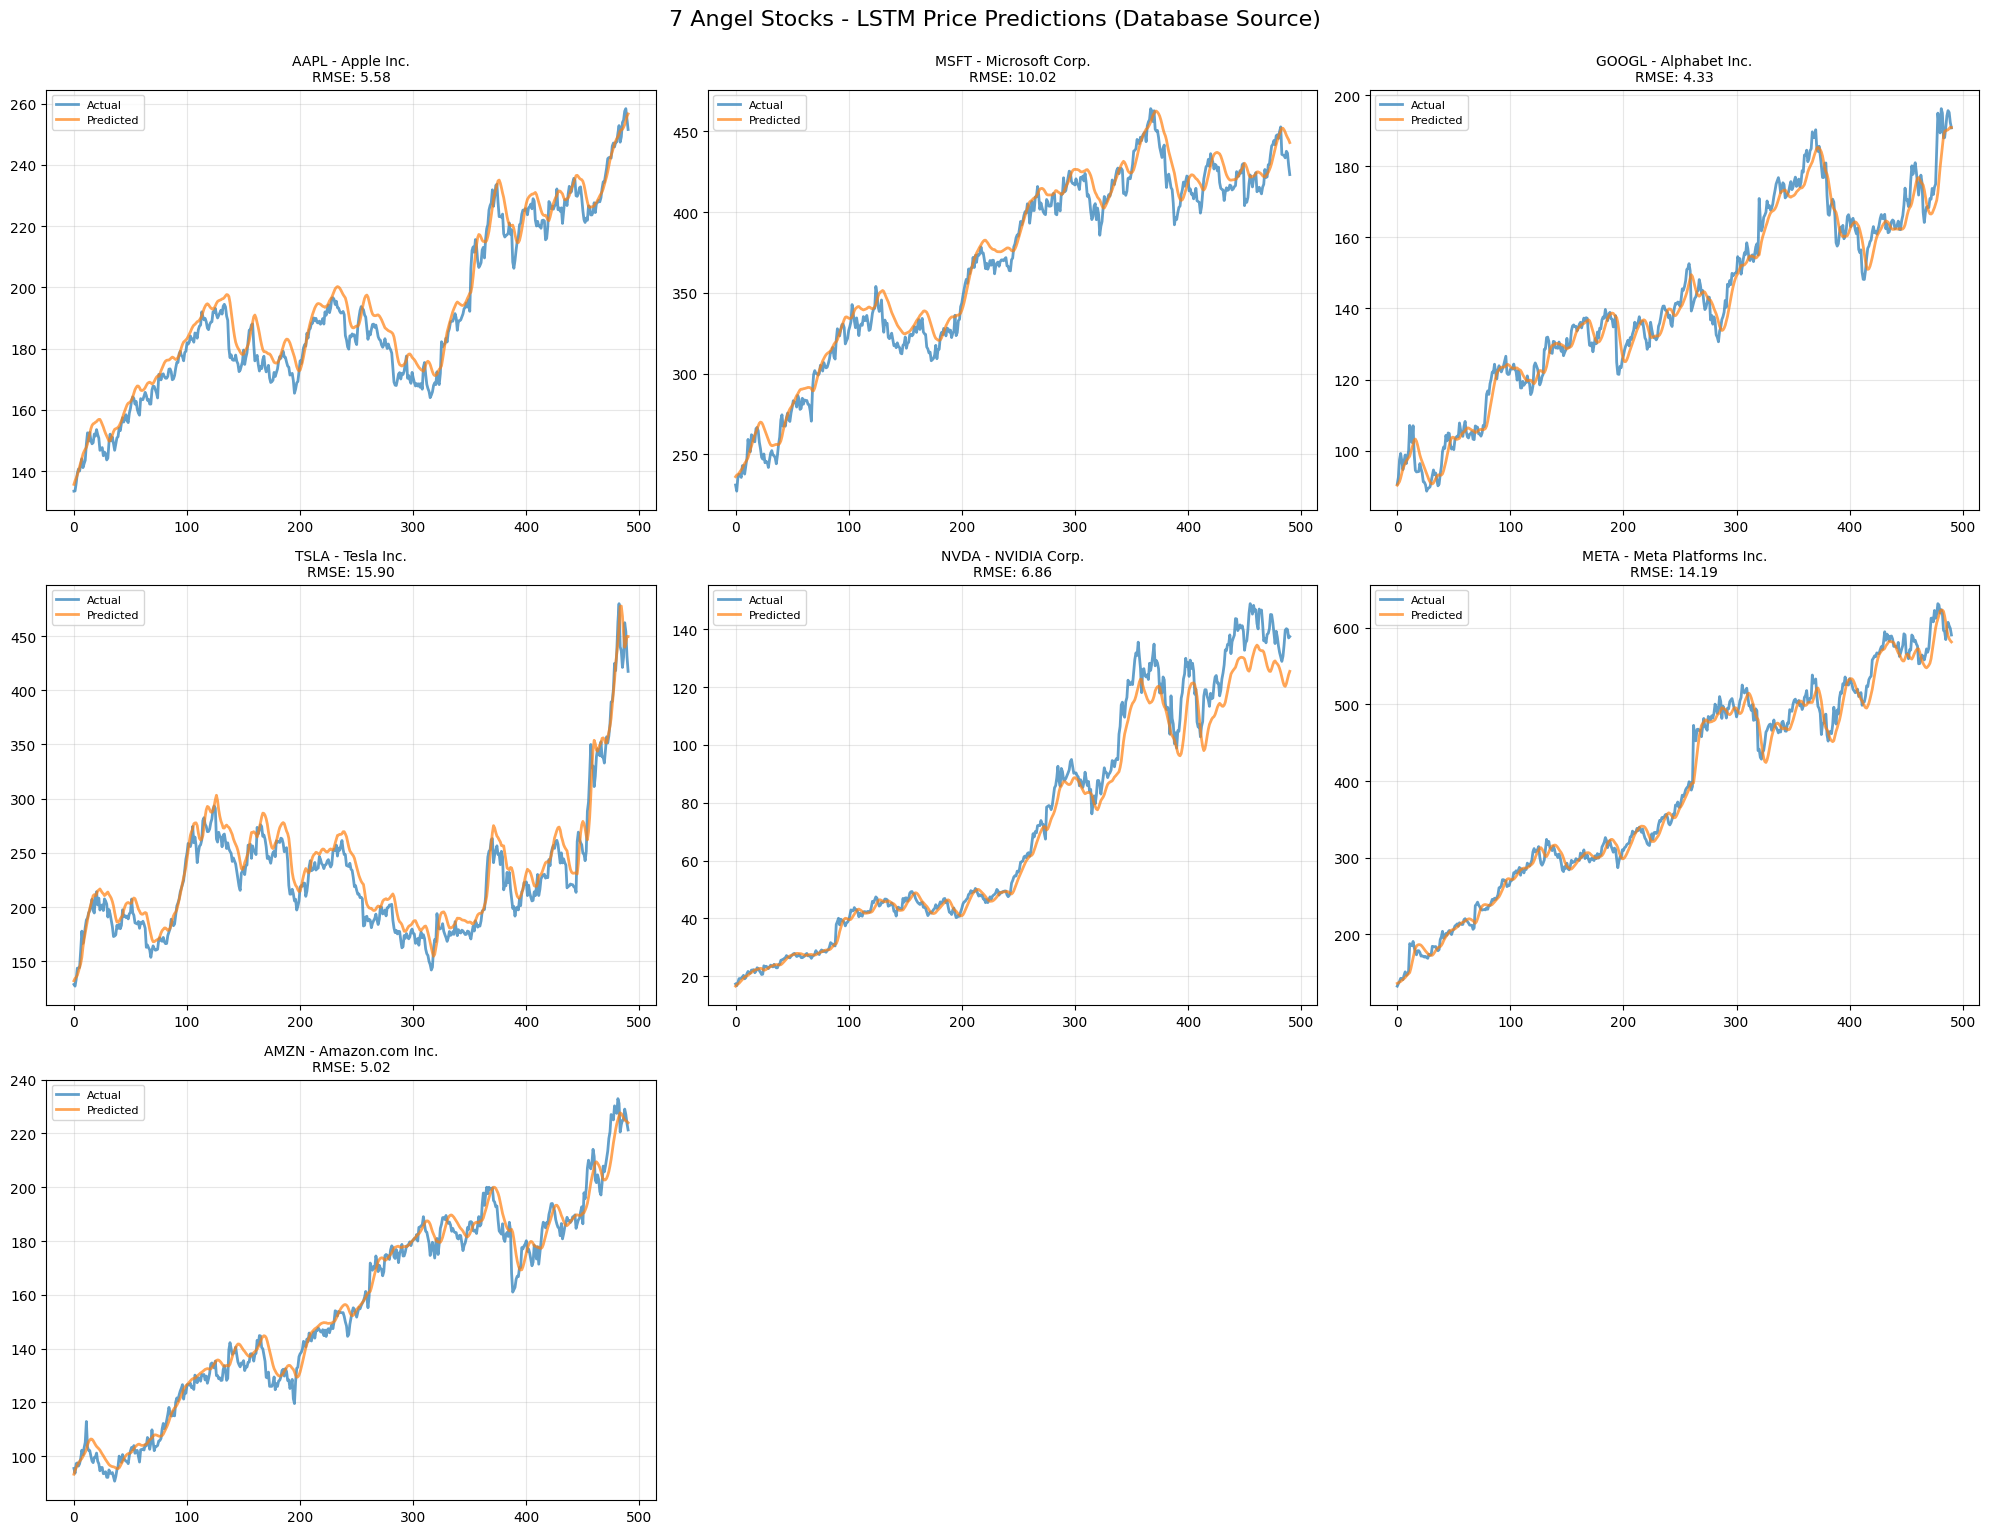


💾 SAVING DATA WAREHOUSE FILES...
✅ Combined Raw Data: data_warehouse/ALL_STOCKS_RAW_DATA.csv
   📊 Total Records: 17,605
✅ Combined Predictions: data_warehouse/ALL_STOCKS_PREDICTIONS.csv
   📊 Total Predictions: 3,437
✅ Performance Analytics: data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv
✅ Data Dictionary: data_warehouse/DATA_DICTIONARY.csv

📁 DATA WAREHOUSE STRUCTURE:
└── data_warehouse/
    ├── ALL_STOCKS_RAW_DATA.csv       (รวมข้อมูลดิบทั้งหมด)
    ├── ALL_STOCKS_PREDICTIONS.csv    (รวมการพยากรณ์ทั้งหมด)
    ├── DATA_DICTIONARY.csv           (คำอธิบายข้อมูล)
    ├── raw_data/                     (ข้อมูลดิบแต่ละหุ้น)
    │   ├── AAPL_raw_data.csv
    │   ├── MSFT_raw_data.csv
    │   └── ... (7 files)
    ├── predictions/                  (การพยากรณ์แต่ละหุ้น)
    │   ├── AAPL_predictions.csv
    │   ├── MSFT_predictions.csv
    │   └── ... (7 files)
    └── analytics/
        └── PERFORMANCE_ANALYTICS.csv (วิเคราะห์ประสิทธิภาพ)

📊 SUMMARY RESULTS - 7 ANGEL STOCKS (DATABASE SOURC

In [3]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore')

# Database configuration
db_config = {
    'server': 'LAPTOP-IH3HR1CO',
    'database': 'DataWarehouse_Stock'
}

# Stock queries mapping
stock_queries = {
    'AAPL': 'SELECT * FROM gold.dim_aapl ORDER BY Date ASC',
    'AMZN': 'SELECT * FROM gold.dim_amzn ORDER BY Date ASC',
    'GOOGL': 'SELECT * FROM gold.dim_googl ORDER BY Date ASC',
    'META': 'SELECT * FROM gold.dim_meta ORDER BY Date ASC',
    'MSFT': 'SELECT * FROM gold.dim_msft ORDER BY Date ASC',
    'NVDA': 'SELECT * FROM gold.dim_nvda ORDER BY Date ASC',
    'TSLA': 'SELECT * FROM gold.dim_tsla ORDER BY Date ASC'
}

# Angel stocks information
angel_stocks = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'GOOGL': 'Alphabet Inc.',
    'TSLA': 'Tesla Inc.',
    'NVDA': 'NVIDIA Corp.',
    'META': 'Meta Platforms Inc.',
    'AMZN': 'Amazon.com Inc.'
}

# สร้าง folder สำหรับเก็บ CSV files
os.makedirs('data_warehouse', exist_ok=True)
os.makedirs('data_warehouse/raw_data', exist_ok=True)
os.makedirs('data_warehouse/predictions', exist_ok=True)
os.makedirs('data_warehouse/analytics', exist_ok=True)

print("🌟 7 Angel Stocks LSTM Prediction + Data Warehouse 🌟")
print("=" * 60)
print("📊 Data Source: SQL Server Database")
print(f"🔗 Server: {db_config['server']}")
print(f"🗄️ Database: {db_config['database']}")
print("💾 CSV Files will be saved to: ./data_warehouse/")
print("=" * 60)

# ฟังก์ชันสำหรับเชื่อมต่อฐานข้อมูล
def connect_to_database():
    try:
        connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={db_config['server']};DATABASE={db_config['database']};Trusted_Connection=yes;"
        conn = pyodbc.connect(connection_string)
        print("✅ Database connection successful!")
        return conn
    except Exception as e:
        print(f"❌ Database connection failed: {str(e)}")
        return None

# ฟังก์ชันสำหรับดึงข้อมูลจากฐานข้อมูล
def fetch_stock_data(conn, symbol):
    try:
        query = stock_queries[symbol]
        print(f"📥 กำลังดึงข้อมูล {symbol} จากฐานข้อมูล...")
        df = pd.read_sql(query, conn)
        
        # แสดงคอลัมน์ที่มีอยู่สำหรับ debug
        print(f"📋 คอลัมน์ที่พบ: {list(df.columns)}")
        
        # ตรวจสอบว่ามีคอลัมน์ Date
        if 'Date' not in df.columns:
            print(f"⚠️ ไม่พบคอลัมน์ 'Date' ในข้อมูล {symbol}")
            return None
        
        # ตรวจสอบคอลัมน์ Close_value แทน Close
        if 'Close_value' not in df.columns:
            print(f"⚠️ ไม่พบคอลัมน์ 'Close_value' ในข้อมูล {symbol}")
            return None
        
        # เปลี่ยนชื่อคอลัมน์เพื่อให้ใช้งานได้
        df = df.rename(columns={
            'Close_value': 'Close',
            'High_value': 'High',
            'Low_value': 'Low',
            'Open_value': 'Open'
        })
        
        # แปลงคอลัมน์ Date เป็น datetime โดยใช้ dayfirst=True สำหรับรูปแบบ dd/mm/yyyy
        try:
            df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
        except:
            # ถ้าไม่ได้ลองใช้ format='mixed'
            try:
                df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
            except:
                # ถ้ายังไม่ได้ ลองใช้ infer_datetime_format
                df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, dayfirst=True)
        
        df.set_index('Date', inplace=True)
        
        # เรียงข้อมูลตามวันที่
        df = df.sort_index()
        
        print(f"✅ ดึงข้อมูล {symbol} สำเร็จ - {len(df)} records")
        print(f"📅 วันที่เริ่มต้น: {df.index[0].strftime('%Y-%m-%d')}")
        print(f"📅 วันที่สิ้นสุด: {df.index[-1].strftime('%Y-%m-%d')}")
        return df
        
    except Exception as e:
        print(f"❌ เกิดข้อผิดพลาดในการดึงข้อมูล {symbol}: {str(e)}")
        return None

# ฟังก์ชันสำหรับสร้างข้อมูลลำดับ
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# ฟังก์ชันสำหรับสร้างและฝึก LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# ฟังก์ชันสำหรับคำนวณ metrics
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# เริ่มต้นการประมวลผล
conn = connect_to_database()
if conn is None:
    print("❌ ไม่สามารถเชื่อมต่อฐานข้อมูลได้ กรุณาตรวจสอบการตั้งค่า")
    exit()

# เก็บผลลัพธ์
results = {}
predictions_data = {}
all_raw_data = []  # สำหรับรวมข้อมูลดิบทั้งหมด
all_predictions = []  # สำหรับรวมข้อมูลพยากรณ์ทั้งหมด

# วนลูปผ่านแต่ละหุ้น
plt.figure(figsize=(20, 15))

for idx, (symbol, name) in enumerate(angel_stocks.items(), 1):
    print(f"\n📈 Processing {symbol} - {name}")
    
    try:
        # ดึงข้อมูลจากฐานข้อมูล
        df = fetch_stock_data(conn, symbol)
        
        if df is None or len(df) < 100:
            print(f"⚠️ ข้อมูล {symbol} ไม่เพียงพอหรือไม่สามารถดึงได้")
            continue
        
        # เพิ่มข้อมูลสำหรับ Data Warehouse
        df_warehouse = df.copy()
        df_warehouse['Symbol'] = symbol
        df_warehouse['Company_Name'] = name
        df_warehouse['Date'] = df_warehouse.index
        df_warehouse = df_warehouse.reset_index(drop=True)
        
        # บันทึกข้อมูลดิบแต่ละหุ้น
        csv_filename = f'data_warehouse/raw_data/{symbol}_raw_data.csv'
        df_warehouse.to_csv(csv_filename, index=False)
        print(f"💾 บันทึก {symbol} raw data -> {csv_filename}")
        
        # เพิ่มเข้า all_raw_data
        all_raw_data.append(df_warehouse)
        
        # เตรียมข้อมูลสำหรับ LSTM
        data = df[['Close']].copy()
        
        # Scaling
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data)
        
        # สร้างชุดข้อมูลลำดับ
        sequence_length = 60
        X, y = create_sequences(scaled_data, sequence_length)
        
        if len(X) == 0:
            print(f"⚠️ ไม่สามารถสร้างลำดับข้อมูลสำหรับ {symbol}")
            continue
        
        # แบ่ง train/test
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        # สร้างและฝึก LSTM
        model = create_lstm_model((X.shape[1], 1))
        
        print(f"🔄 กำลังฝึก model สำหรับ {symbol}...")
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                          validation_split=0.1, verbose=0)
        
        # พยากรณ์
        predicted = model.predict(X_test, verbose=0)
        predicted_prices = scaler.inverse_transform(predicted)
        real_prices = scaler.inverse_transform(y_test)
        
        # คำนวณ metrics
        mse, mae, rmse = calculate_metrics(real_prices, predicted_prices)
        
        # เก็บผลลัพธ์
        results[symbol] = {
            'name': name,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'last_price': real_prices[-1][0],
            'predicted_next': predicted_prices[-1][0]
        }
        
        predictions_data[symbol] = {
            'actual': real_prices.flatten(),
            'predicted': predicted_prices.flatten(),
            'dates': data.index[train_size + sequence_length:]
        }
        
        # สร้าง DataFrame สำหรับ predictions และบันทึกเป็น CSV
        pred_df = pd.DataFrame({
            'Date': data.index[train_size + sequence_length:],
            'Symbol': symbol,
            'Company_Name': name,
            'Actual_Price': real_prices.flatten(),
            'Predicted_Price': predicted_prices.flatten(),
            'Prediction_Error': real_prices.flatten() - predicted_prices.flatten(),
            'Error_Percentage': ((real_prices.flatten() - predicted_prices.flatten()) / real_prices.flatten()) * 100
        })
        
        # บันทึกการพยากรณ์แต่ละหุ้น
        pred_filename = f'data_warehouse/predictions/{symbol}_predictions.csv'
        pred_df.to_csv(pred_filename, index=False)
        print(f"💾 บันทึก {symbol} predictions -> {pred_filename}")
        
        # เพิ่มเข้า all_predictions
        all_predictions.append(pred_df)
        
        # สร้างกราฟ
        plt.subplot(3, 3, idx)
        plt.plot(real_prices, label='Actual', alpha=0.7, linewidth=2)
        plt.plot(predicted_prices, label='Predicted', alpha=0.7, linewidth=2)
        plt.title(f'{symbol} - {name}\nRMSE: {rmse:.2f}', fontsize=10)
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        
        print(f"✅ {symbol} สำเร็จ - RMSE: {rmse:.2f}")
        
    except Exception as e:
        print(f"❌ เกิดข้อผิดพลาดกับ {symbol}: {str(e)}")
        continue

# ปิดการเชื่อมต่อฐานข้อมูล
conn.close()
print("\n🔐 Database connection closed")

plt.tight_layout()
plt.suptitle('7 Angel Stocks - LSTM Price Predictions (Database Source)', fontsize=16, y=1.02)
plt.show()

# 💾 บันทึกข้อมูลรวมเป็น CSV Files สำหรับ Data Warehouse
print("\n" + "="*60)
print("💾 SAVING DATA WAREHOUSE FILES...")
print("="*60)

# 1. รวมข้อมูลดิบทั้งหมด
if all_raw_data:
    combined_raw = pd.concat(all_raw_data, ignore_index=True)
    combined_raw_file = 'data_warehouse/ALL_STOCKS_RAW_DATA.csv'
    combined_raw.to_csv(combined_raw_file, index=False)
    print(f"✅ Combined Raw Data: {combined_raw_file}")
    print(f"   📊 Total Records: {len(combined_raw):,}")

# 2. รวมข้อมูลพยากรณ์ทั้งหมด
if all_predictions:
    combined_predictions = pd.concat(all_predictions, ignore_index=True)
    combined_pred_file = 'data_warehouse/ALL_STOCKS_PREDICTIONS.csv'
    combined_predictions.to_csv(combined_pred_file, index=False)
    print(f"✅ Combined Predictions: {combined_pred_file}")
    print(f"   📊 Total Predictions: {len(combined_predictions):,}")

# 3. สร้าง Summary Analytics
if results:
    analytics_data = []
    for symbol, data in results.items():
        analytics_data.append({
            'Symbol': symbol,
            'Company_Name': data['name'],
            'MSE': data['mse'],
            'MAE': data['mae'],
            'RMSE': data['rmse'],
            'Last_Actual_Price': data['last_price'],
            'Next_Predicted_Price': data['predicted_next'],
            'Price_Change_Prediction': data['predicted_next'] - data['last_price'],
            'Price_Change_Percent': ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100,
            'Analysis_Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'Data_Source': f'SQL Server Database - {db_config["database"]}'
        })
    
    analytics_df = pd.DataFrame(analytics_data)
    analytics_file = 'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv'
    analytics_df.to_csv(analytics_file, index=False)
    print(f"✅ Performance Analytics: {analytics_file}")

# 4. สร้าง Data Dictionary
data_dict = {
    'Table_Name': [
        'ALL_STOCKS_RAW_DATA',
        'ALL_STOCKS_PREDICTIONS', 
        'PERFORMANCE_ANALYTICS',
        'Individual Stock Files'
    ],
    'Description': [
        'Combined historical stock data for all 7 angel stocks from database',
        'LSTM model predictions vs actual prices',
        'Model performance metrics and investment insights',
        'Individual CSV files for each stock (raw data + predictions)'
    ],
    'Location': [
        'data_warehouse/ALL_STOCKS_RAW_DATA.csv',
        'data_warehouse/ALL_STOCKS_PREDICTIONS.csv',
        'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv',
        'data_warehouse/raw_data/ & data_warehouse/predictions/'
    ],
    'Update_Frequency': [
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)'
    ],
    'Data_Source': [
        f'SQL Server: {db_config["server"]}/{db_config["database"]}',
        'LSTM Model Predictions',
        'Calculated Metrics',
        'Database + Model Output'
    ]
}

data_dict_df = pd.DataFrame(data_dict)
dict_file = 'data_warehouse/DATA_DICTIONARY.csv'
data_dict_df.to_csv(dict_file, index=False)
print(f"✅ Data Dictionary: {dict_file}")

print(f"\n📁 DATA WAREHOUSE STRUCTURE:")
print(f"└── data_warehouse/")
print(f"    ├── ALL_STOCKS_RAW_DATA.csv       (รวมข้อมูลดิบทั้งหมด)")
print(f"    ├── ALL_STOCKS_PREDICTIONS.csv    (รวมการพยากรณ์ทั้งหมด)")
print(f"    ├── DATA_DICTIONARY.csv           (คำอธิบายข้อมูล)")
print(f"    ├── raw_data/                     (ข้อมูลดิบแต่ละหุ้น)")
print(f"    │   ├── AAPL_raw_data.csv")
print(f"    │   ├── MSFT_raw_data.csv")
print(f"    │   └── ... (7 files)")
print(f"    ├── predictions/                  (การพยากรณ์แต่ละหุ้น)")
print(f"    │   ├── AAPL_predictions.csv")
print(f"    │   ├── MSFT_predictions.csv")
print(f"    │   └── ... (7 files)")
print(f"    └── analytics/")
print(f"        └── PERFORMANCE_ANALYTICS.csv (วิเคราะห์ประสิทธิภาพ)")

# 7. สรุปผลลัพธ์
print("\n" + "="*80)
print("📊 SUMMARY RESULTS - 7 ANGEL STOCKS (DATABASE SOURCE)")
print("="*80)

if results:
    # สร้าง DataFrame สำหรับสรุป
    summary_df = pd.DataFrame(results).T
    summary_df = summary_df.round(2)
    
    print("\n🏆 PERFORMANCE RANKING (จากดีที่สุด - RMSE ต่ำสุด)")
    print("-" * 60)
    
    sorted_results = sorted(results.items(), key=lambda x: x[1]['rmse'])
    
    for rank, (symbol, data) in enumerate(sorted_results, 1):
        print(f"{rank}. {symbol} ({data['name']})")
        print(f"   RMSE: ${data['rmse']:.2f} | MAE: ${data['mae']:.2f}")
        print(f"   ราคาล่าสุด: ${data['last_price']:.2f}")
        print(f"   พยากรณ์: ${data['predicted_next']:.2f}")
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        trend = "📈" if change > 0 else "📉"
        print(f"   แนวโน้ม: {trend} {change:+.1f}%")
        print()
    
    # แสดงสถิติรวม
    avg_rmse = np.mean([data['rmse'] for data in results.values()])
    best_stock = min(results.items(), key=lambda x: x[1]['rmse'])
    worst_stock = max(results.items(), key=lambda x: x[1]['rmse'])
    
    print(f"📈 PORTFOLIO STATISTICS")
    print(f"Average RMSE: ${avg_rmse:.2f}")
    print(f"Best Performer: {best_stock[0]} (RMSE: ${best_stock[1]['rmse']:.2f})")
    print(f"Needs Improvement: {worst_stock[0]} (RMSE: ${worst_stock[1]['rmse']:.2f})")
    
    # แสดงข้อเสนอแนะ
    print(f"\n💡 INVESTMENT INSIGHTS")
    print(f"✨ หุ้นที่มีแนวโน้มดี (พยากรณ์เพิ่มขึ้น > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change > 2:
            print(f"   📈 {symbol}: +{change:.1f}%")
    
    print(f"\n⚠️  หุ้นที่ควรระวัง (พยากรณ์ลดลง > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change < -2:
            print(f"   📉 {symbol}: {change:.1f}%")

else:
    print("❌ ไม่มีข้อมูลที่ประมวลผลสำเร็จ")

print(f"\n🌟 Happy Trading with 7 Angel Stocks! 🌟")
print(f"📊 Data Source: {db_config['server']}/{db_config['database']}")